In [1]:
from pysmo.sac import sacio, sacfunc
import numpy as np
import librosa
from librosa import display
import matplotlib.pyplot as plt
from audio_embed import utilities
utilities.apply_style()
%matplotlib inline
p44a = sacio.sacfile('20120411_Shikoku/AIDA.E.SAC', 'ro')

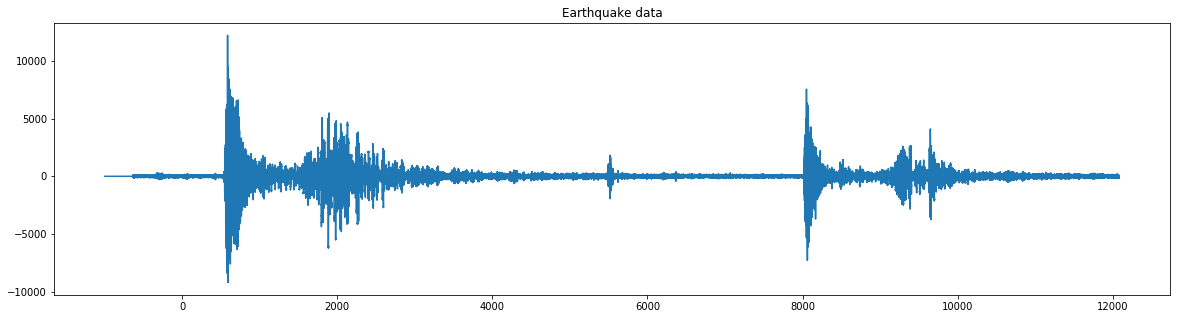

In [10]:
t, data = sacfunc.sac2xy(p44a)
data = np.array(data)
t = np.array(t)
plt.figure(figsize=(20, 5))
plt.plot(t, data)
plt.title('Earthquake data')
plt.show()

utilities.audio(data[50000:60000], 2000)

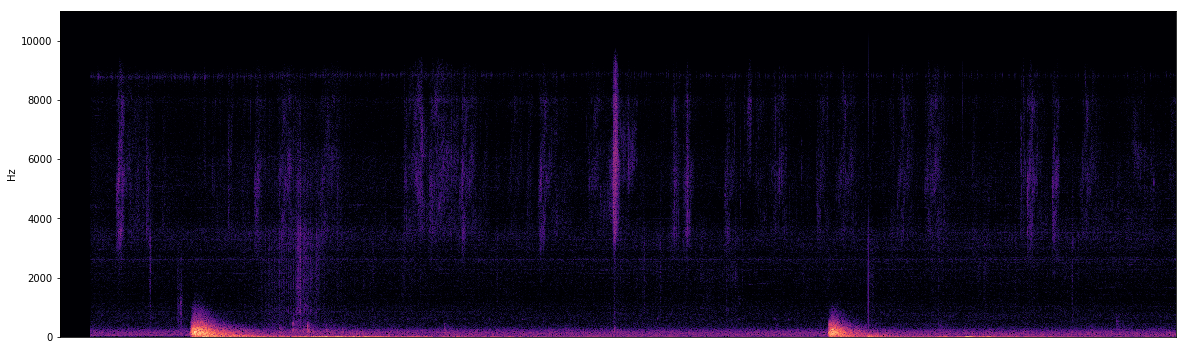

In [15]:
import librosa

lowspeed = 400
medspeed = 800
highspeed = 1600

# dflines[1:] is a 1D array of the time series, dflines[0] contains some metadata
sound = data
fsps = np.float(40.0)
# original sampling rate (presumed 40 Hz)
tot = np.float(len(data))
# total number of samples in time series

low_sampling_rate = lowspeed*fsps
med_sampling_rate = medspeed*fsps
high_sampling_rate = highspeed*fsps

# add 1 % to both to avoid hitting the roof or floor exactly.
scaledsound = sound/np.max(np.abs(sound))
# scale sound to fit in 4-byte integer and
# convert sound to 4-byte integer
# write .wav sound files with different compression factors:
spectrogram = librosa.amplitude_to_db(librosa.stft(scaledsound), ref=np.max)
plt.figure(figsize=(20, 6))
librosa.display.specshow(spectrogram, y_axis='linear')
plt.show()

utilities.audio(scaledsound, low_sampling_rate)
utilities.audio(scaledsound, med_sampling_rate)
utilities.audio(scaledsound, high_sampling_rate)

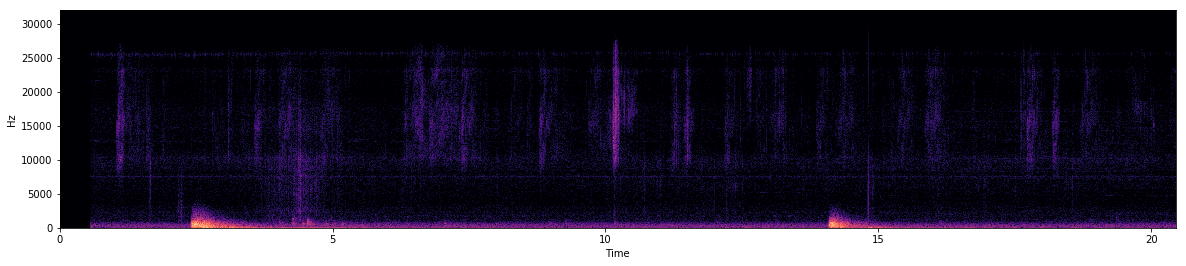

In [23]:
spectrogram = librosa.amplitude_to_db(librosa.stft(scaledsound), ref=np.max)
plt.figure(figsize=(20, 4))
librosa.display.specshow(spectrogram, sr=high_sampling_rate, x_axis='time', y_axis='linear')
plt.show()
